# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=80cc9aedd4db7cb6f8a65ec6c00e9d276301a2cc3d31bd4089acb81e7ddad6fc
  Stored in directory: c:\users\gu202\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [29]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import gmaps

# citipy can find the city based on latitude and longitude.
from citipy import citipy

# OpenWeatherMap and Google developer API key
from api_keys import g_key, weather_api_key

# Access maps with unique API key
gmaps.configure(api_key=g_key)


# matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st

## Generate Cities List

In [8]:
# initialize city list
latitude_longitude_list = []
cityList = []

# random generate latitude and longitude
latitude = np.random.uniform(low=-90.00, high=90.00, size=1200)
longitude = np.random.uniform(low=-180.00, high=180.00, size=1200)
latitude_longitude_list = zip(latitude, longitude)

for latitude_longitude in latitude_longitude_list:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    
    # if city is not in the city list, then add it in the list
    if city not in cityList:
        cityList.append(city)

# check how many cities in the list
len(cityList)

# print(cityList)

518

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# initialize the dataframe 

weather_data_df =pd.DataFrame({"City":cityList,
                               "Lat": "",
                               "Lng": "",
                               "Max Temp": "",
                               "Humidity": "",
                               "Cloudiness": "",
                               "Wind Speed": "",
                               "Country": "",
                               "Date": ""
                              })

weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grindavik,,,,,,,,
1,mataura,,,,,,,,
2,drumnadrochit,,,,,,,,
3,busselton,,,,,,,,
4,jamestown,,,,,,,,


In [10]:
# Build query URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = base_url + "appid=" + weather_api_key + "&units=" + "metric" + "&q="

# Initialize Count and Set Number
count = 1
setNumber = 1

# check the format of the data
# response= requests.get(query_url + "London").json()
# print(json.dumps(response, indent=4, sort_keys=True))

print("Beginning Data Retrieval")
print("-----------------------------")
for i,row in weather_data_df.iterrows():
    try:
        target_city=row["City"]
        response=requests.get(query_url + target_city).json()
        weather_data_df.loc[i,'Lat']=response['coord']['lat']
        weather_data_df.loc[i,'Lng']=response['coord']['lon']
        weather_data_df.loc[i,'Max Temp']=response['main']['temp_max']
        weather_data_df.loc[i,'Humidity']=response['main']['humidity']
        weather_data_df.loc[i,'Cloudiness']=response['clouds']['all']
        weather_data_df.loc[i,'Wind Speed']=response['wind']['speed']
        weather_data_df.loc[i,'Country']=response['sys']['country']
        weather_data_df.loc[i,'Date']=response['dt']
        print(f"Processing Record {count} of Set {setNumber} | {target_city}")
        count = count + 1
        if count>50:
            count = 1
            setNumber = setNumber + 1
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | grindavik
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | drumnadrochit
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | gunjur
Processing Record 7 of Set 1 | rikitea
City not found. Skipping...
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | minab
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | kamaishi
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | sindor
Processing Record 20 of Set 1 | chifeng
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | cururupu
Processing Record 23

Processing Record 39 of Set 4 | broken hill
Processing Record 40 of Set 4 | las vegas
Processing Record 41 of Set 4 | alyangula
Processing Record 42 of Set 4 | assai
Processing Record 43 of Set 4 | tual
Processing Record 44 of Set 4 | harper
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | saint anthony
Processing Record 47 of Set 4 | arlit
Processing Record 48 of Set 4 | los alamos
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | talnakh
Processing Record 1 of Set 5 | tumbagaan
Processing Record 2 of Set 5 | izhevskoye
Processing Record 3 of Set 5 | gadung
Processing Record 4 of Set 5 | port hardy
Processing Record 5 of Set 5 | medicine hat
Processing Record 6 of Set 5 | ulaangom
Processing Record 7 of Set 5 | college
Processing Record 8 of Set 5 | chokurdakh
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 5 | raga
Processing Record 10 of Set 5 | merauke
Processing Record 11 of Set 5 | avarua
Processing

Processing Record 25 of Set 8 | sur
Processing Record 26 of Set 8 | tolbazy
Processing Record 27 of Set 8 | capalonga
Processing Record 28 of Set 8 | flinders
Processing Record 29 of Set 8 | navahrudak
Processing Record 30 of Set 8 | kenitra
Processing Record 31 of Set 8 | wanning
City not found. Skipping...
Processing Record 32 of Set 8 | benghazi
Processing Record 33 of Set 8 | ottawa
City not found. Skipping...
Processing Record 34 of Set 8 | yumen
Processing Record 35 of Set 8 | kibala
Processing Record 36 of Set 8 | lavrentiya
Processing Record 37 of Set 8 | lucapa
Processing Record 38 of Set 8 | vila franca do campo
Processing Record 39 of Set 8 | mehamn
Processing Record 40 of Set 8 | lingion
Processing Record 41 of Set 8 | myrtle beach
Processing Record 42 of Set 8 | ilinskiy
Processing Record 43 of Set 8 | kamenka
Processing Record 44 of Set 8 | lisakovsk
Processing Record 45 of Set 8 | lima
Processing Record 46 of Set 8 | turangi
Processing Record 47 of Set 8 | altamira
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# replace blank and remove NA from dataframe
weather_data_df.replace('', np.nan, inplace=True)
weather_data_df.dropna(inplace=True)
weather_data_df.count()

City          468
Lat           468
Lng           468
Max Temp      468
Humidity      468
Cloudiness    468
Wind Speed    468
Country       468
Date          468
dtype: int64

In [16]:
# export the data into a csv
weather_data_df.to_csv("weather_output.csv")
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grindavik,63.84,-22.43,3.00,86.0,75.0,3.60,IS,1.600841e+09
1,mataura,-46.19,168.86,15.56,66.0,66.0,2.68,NZ,1.600841e+09
2,drumnadrochit,57.33,-4.48,6.11,93.0,75.0,2.10,GB,1.600841e+09
3,busselton,-33.65,115.33,22.22,39.0,24.0,1.77,AU,1.600841e+09
4,jamestown,42.10,-79.24,10.56,87.0,1.0,2.27,US,1.600841e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data_df.loc[weather_data_df['Humidity'].astype(float)<=100]
len(clean_city_data)


468

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

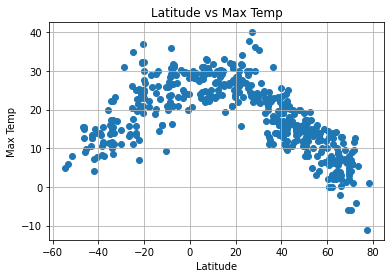

In [20]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Max Temp']
plt.scatter(x_values,y_values)
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp')
plt.grid()
plt.savefig("Latitude vs Max Temp.png")
plt.show()

## Latitude vs. Humidity Plot

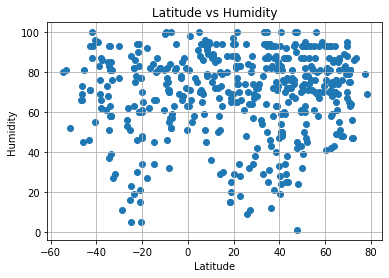

In [21]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity')
plt.grid()
plt.savefig("Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

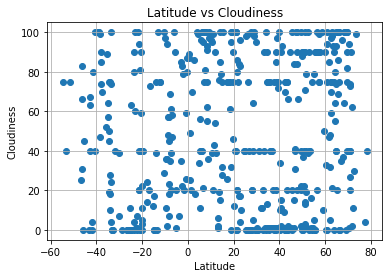

In [23]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness')
plt.grid()
plt.savefig("Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

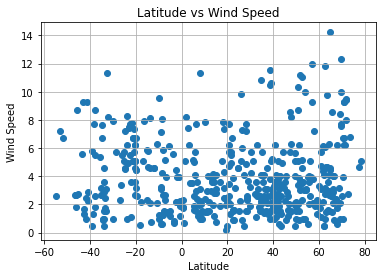

In [24]:
x_values=clean_city_data['Lat']
y_values=clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed')
plt.grid()
plt.savefig("Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [26]:
# Create the Northern Hemisphere and Southern Hemisphere dataframe
northern_hemisphere = weather_data_df.loc[weather_data_df['Lat']>0]
southern_hemisphere = weather_data_df.loc[weather_data_df['Lat']<=0]

southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,mataura,-46.19,168.86,15.56,66.0,66.0,2.68,NZ,1.600841e+09
3,busselton,-33.65,115.33,22.22,39.0,24.0,1.77,AU,1.600841e+09
6,rikitea,-23.12,-134.97,22.63,75.0,60.0,7.43,PF,1.600841e+09
11,saint-philippe,-21.36,55.77,24.00,60.0,20.0,6.70,RE,1.600841e+09
18,carnarvon,-24.87,113.63,35.00,5.0,0.0,7.20,AU,1.600841e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

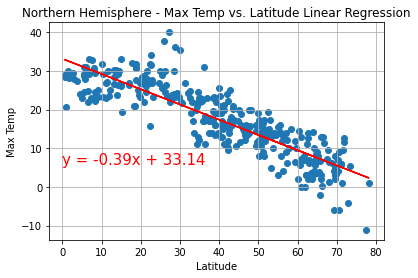

In [33]:
x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,6),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.grid()
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

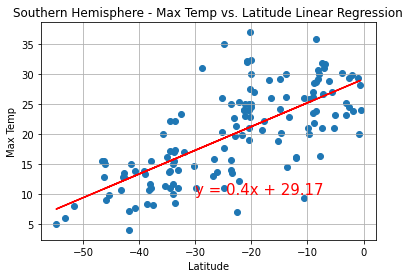

In [41]:
x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.grid()
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

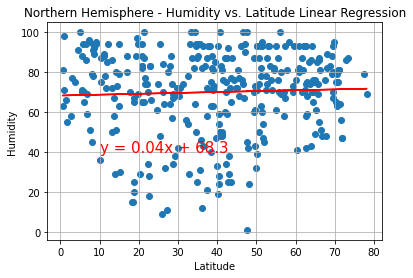

In [44]:
x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.grid()
plt.savefig("Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

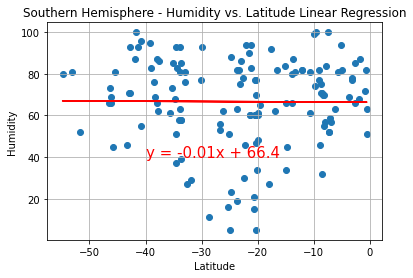

In [45]:
x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.grid()
plt.savefig("Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

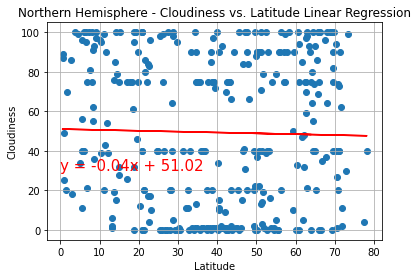

In [47]:
x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.grid()
plt.savefig("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

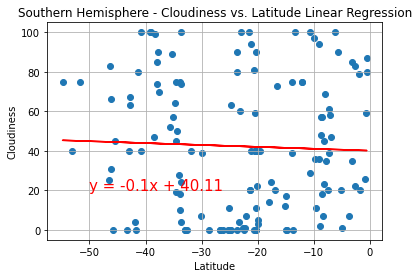

In [48]:
x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.grid()
plt.savefig("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

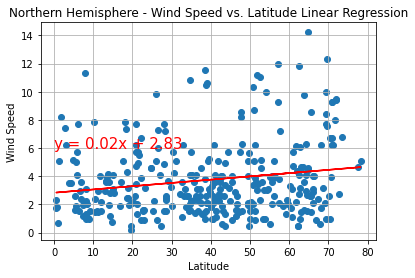

In [39]:
x_values=northern_hemisphere['Lat']
y_values=northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,6),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.grid()
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

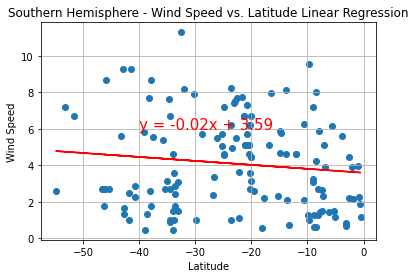

In [49]:
x_values=southern_hemisphere['Lat']
y_values=southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,6),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.grid()
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()